In [1]:
import cv2
import os
import numpy as np
import torch
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import v2
from torchvision import tv_tensors, datasets
from PIL import Image
import json
plt.rcParams["savefig.bbox"] = "tight"

from torchvision.transforms import functional as F
from torchvision.datasets.coco import CocoDetection

In [2]:
IMAGES_PATH = r"G:\Program\DATABASE_JPG"
ANNOTATIONS_PATH = r"G:\Program\DeepLearning\coco_config.json"

transforms = v2.Compose(
    [
        v2.ToImage(),
        v2.RandomPhotometricDistort(p=1),
        # 随机放大图像并在放大后的图像周围填充背景。
        # fill={v2.Image: (123, 117, 104), "others": 0}：图像的填充颜色为 RGB 值 (123, 117, 104)，其他数据类型的填充值为 0。
        v2.RandomZoomOut(fill={tv_tensors.Image: (123, 117, 104), "others": 0}),
        # RandomIoUCrop 是一个随机裁剪操作，它会根据一定的 IoU（Intersection over Union）阈值来裁剪图像。这个操作可能会导致一些边界框变得无效，所以我们需要使用 SanitizeBoundingBoxes 来移除无效的边界框。
        # v2.RandomIoUCrop(),
        v2.RandomHorizontalFlip(p=1),
        # 用于清理退化的边界框及其对应的标签和掩码。它会检查边界框的有效性，并移除那些无效的边界框。
        # v2.SanitizeBoundingBoxes(),
        v2.ToDtype(torch.float32, scale=True),
    ]
)


In [3]:
dataset = datasets.CocoDetection(IMAGES_PATH, ANNOTATIONS_PATH, transforms=transforms)
dataset = datasets.wrap_dataset_for_transforms_v2(dataset, target_keys=("boxes", "labels", "masks"))
data_loader = torch.utils.data.DataLoader(
    dataset,
    batch_size=1,
    shuffle=False,
    collate_fn=lambda batch: tuple(zip(*batch)),
)
sample = dataset[0]
img, target = sample
# print(f"{type(img) = }\n{type(target) = }\n{type(target[0]) = }\n{target[0].keys() = }")


loading annotations into memory...
Done (t=0.56s)
creating index...
index created!


In [4]:

sample = dataset[0]
img, target = sample
print(f"{type(img) = }, {type(target) = }, {target.keys() = }")

print(f"{type(target['boxes']) = }, {type(target['labels']) = }", type(target['masks']))

print(f"{target['boxes'] = }\n{target['labels'] = }")
print(f"{target['masks'] = }")
print(img)


type(img) = <class 'torchvision.tv_tensors._image.Image'>, type(target) = <class 'dict'>, target.keys() = dict_keys(['boxes', 'masks', 'labels'])
type(target['boxes']) = <class 'torchvision.tv_tensors._bounding_boxes.BoundingBoxes'>, type(target['labels']) = <class 'torch.Tensor'> <class 'torchvision.tv_tensors._mask.Mask'>
target['boxes'] = BoundingBoxes([[738, 870, 742, 878],
               [917, 898, 929, 910],
               [747, 898, 762, 915]], format=BoundingBoxFormat.XYXY, canvas_size=(1453, 1453))
target['labels'] = tensor([1, 2, 2])
target['masks'] = Mask([[[0, 0, 0,  ..., 0, 0, 0],
       [0, 0, 0,  ..., 0, 0, 0],
       [0, 0, 0,  ..., 0, 0, 0],
       ...,
       [0, 0, 0,  ..., 0, 0, 0],
       [0, 0, 0,  ..., 0, 0, 0],
       [0, 0, 0,  ..., 0, 0, 0]],

      [[0, 0, 0,  ..., 0, 0, 0],
       [0, 0, 0,  ..., 0, 0, 0],
       [0, 0, 0,  ..., 0, 0, 0],
       ...,
       [0, 0, 0,  ..., 0, 0, 0],
       [0, 0, 0,  ..., 0, 0, 0],
       [0, 0, 0,  ..., 0, 0, 0]],

      [[

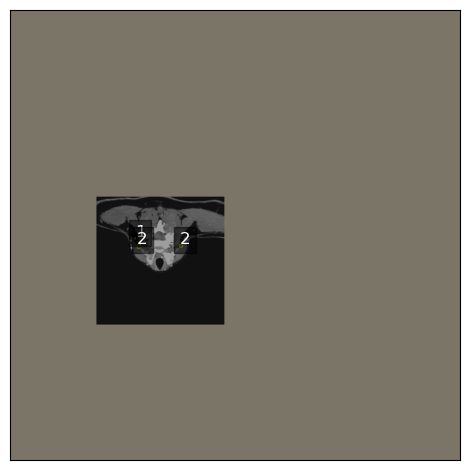

In [5]:
from helpers import plot

plot([dataset[0]])

In [8]:
for i, sample in enumerate(data_loader):
    print(i)
    img, target = sample
    print(f"{type(img) = }, {type(target) = }")


0
type(img) = <class 'tuple'>, type(target) = <class 'tuple'>
1
type(img) = <class 'tuple'>, type(target) = <class 'tuple'>
2
type(img) = <class 'tuple'>, type(target) = <class 'tuple'>
3
type(img) = <class 'tuple'>, type(target) = <class 'tuple'>
4
type(img) = <class 'tuple'>, type(target) = <class 'tuple'>
5
type(img) = <class 'tuple'>, type(target) = <class 'tuple'>
6
type(img) = <class 'tuple'>, type(target) = <class 'tuple'>
7
type(img) = <class 'tuple'>, type(target) = <class 'tuple'>
8
type(img) = <class 'tuple'>, type(target) = <class 'tuple'>
9
type(img) = <class 'tuple'>, type(target) = <class 'tuple'>
10
type(img) = <class 'tuple'>, type(target) = <class 'tuple'>
11
type(img) = <class 'tuple'>, type(target) = <class 'tuple'>
12
type(img) = <class 'tuple'>, type(target) = <class 'tuple'>
13
type(img) = <class 'tuple'>, type(target) = <class 'tuple'>
14
type(img) = <class 'tuple'>, type(target) = <class 'tuple'>
15
type(img) = <class 'tuple'>, type(target) = <class 'tuple'>
16

TypeError: Argument 'bb' has incorrect type (expected numpy.ndarray, got list)